## New York City Taxi Dataset 2013

This notebook contains Basic Exploratory Data Analysis and Data Cleaning for both the trip data and fare data for October 2013

In [1]:
# !pip3 install geopy

### Importing the required libraries

In [2]:
import pandas as pd

import geopy
import geopy.distance as gd
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import matplotlib.pyplot as plt
import plotly_express as px

import math
import numpy as np

### Reading data from both trip data and fare data using pandas

In [3]:
taxi_trip_df = pd.read_csv('/data/shared/debdeep_guha/nyc_taxi_data/trip_data_10.csv')

In [4]:
taxi_trip_df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,N,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,N,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,N,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001


In [5]:
# number of records in trip_data_10 
len(taxi_trip_df)

15004556

In [6]:
taxi_fare_df = pd.read_csv('/data/shared/debdeep_guha/nyc_taxi_data/trip_fare_10.csv')

In [7]:
taxi_fare_df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,2013-10-01 12:44:29,CRD,8.0,0.0,0.5,2.1,0.0,10.6
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,2013-10-02 19:44:55,CRD,18.0,1.0,0.5,3.0,0.0,22.5
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,2013-10-02 22:01:18,CRD,9.5,0.5,0.5,2.1,0.0,12.6
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,2013-10-03 12:14:35,CRD,8.5,0.0,0.5,1.8,0.0,10.8
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,2013-10-02 00:33:37,CRD,43.0,0.5,0.5,11.0,0.0,55.0


In [8]:
# number of records in trip_fare_10 
len(taxi_fare_df)

15004556

## Basic EDA of both trip and fare data

In [9]:
taxi_trip_df.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07,1.500382e+07,1.500382e+07
mean,1.034433e+00,1.694983e+00,7.841873e+02,2.948927e+00,-7.314772e+01,4.029459e+01,-7.309954e+01,4.026885e+01
std,3.322764e-01,1.364966e+00,5.821540e+02,3.442757e+00,7.819167e+00,4.288161e+00,8.018198e+00,4.487413e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.150235e+03,-4.945624e+01,-2.130783e+03,-3.114418e+03
25%,1.000000e+00,1.000000e+00,3.880000e+02,1.080000e+00,-7.399223e+01,4.073492e+01,-7.399155e+01,4.073402e+01
50%,1.000000e+00,1.000000e+00,6.490000e+02,1.800000e+00,-7.398183e+01,4.075283e+01,-7.398019e+01,4.075333e+01
75%,1.000000e+00,2.000000e+00,1.020000e+03,3.260000e+00,-7.396701e+01,4.076758e+01,-7.396390e+01,4.076830e+01
max,2.100000e+02,9.000000e+00,1.080000e+04,1.000000e+02,8.343336e+01,5.006167e+02,1.605801e+02,4.947667e+02


In [10]:
taxi_fare_df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07,1.500456e+07
mean,1.264563e+01,3.204512e-01,4.981457e-01,1.445894e+00,2.777975e-01,1.518808e+01
std,1.029977e+01,3.627333e-01,3.039265e-02,2.276701e+00,1.259588e+00,1.244084e+01
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.150000e+01
75%,1.450000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.700000e+01
max,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,5.000000e+02


#### Checking the number of nulls if any for each column in both dataframes

In [11]:
taxi_trip_df.isnull().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 rate_code                   0
 store_and_fwd_flag    7529626
 pickup_datetime             0
 dropoff_datetime            0
 passenger_count             0
 trip_time_in_secs           0
 trip_distance               0
 pickup_longitude            0
 pickup_latitude             0
 dropoff_longitude         736
 dropoff_latitude          736
dtype: int64

In [12]:
taxi_fare_df.isnull().sum()

medallion           0
 hack_license       0
 vendor_id          0
 pickup_datetime    0
 payment_type       0
 fare_amount        0
 surcharge          0
 mta_tax            0
 tip_amount         0
 tolls_amount       0
 total_amount       0
dtype: int64

#### Checking the number of unique values in both the dataframes

In [13]:
for cols in taxi_trip_df.columns:
    print('Number of unique values in %s is %s' %(cols, len(taxi_trip_df[cols].unique())))

Number of unique values in medallion is 13448
Number of unique values in  hack_license is 33456
Number of unique values in  vendor_id is 2
Number of unique values in  rate_code is 12
Number of unique values in  store_and_fwd_flag is 3
Number of unique values in  pickup_datetime is 2330183
Number of unique values in  dropoff_datetime is 2331877
Number of unique values in  passenger_count is 9
Number of unique values in  trip_time_in_secs is 7270
Number of unique values in  trip_distance is 4306
Number of unique values in  pickup_longitude is 37973
Number of unique values in  pickup_latitude is 63093
Number of unique values in  dropoff_longitude is 55492
Number of unique values in  dropoff_latitude is 88898


In [14]:
for cols in taxi_fare_df.columns:
    print('Number of unique values in %s is %s' %(cols, len(taxi_fare_df[cols].unique())))

Number of unique values in medallion is 13448
Number of unique values in  hack_license is 33456
Number of unique values in  vendor_id is 2
Number of unique values in  pickup_datetime is 2330183
Number of unique values in  payment_type is 5
Number of unique values in  fare_amount is 1620
Number of unique values in  surcharge is 46
Number of unique values in  mta_tax is 2
Number of unique values in  tip_amount is 3475
Number of unique values in  tolls_amount is 638
Number of unique values in  total_amount is 11239


#### Checking the column names in each dataframe

In [15]:
taxi_trip_df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],
      dtype='object')

In [16]:
taxi_fare_df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')

#### Removing any trailing spaces from the column names (might cause silly problems later)

In [17]:
taxi_trip_col_dict = {}
for cols in taxi_trip_df.columns:
    taxi_trip_col_dict[cols] = cols.strip()
taxi_trip_df.rename(columns=taxi_trip_col_dict, inplace=True)

taxi_fare_col_dict = {}
for cols in taxi_fare_df.columns:
    taxi_fare_col_dict[cols] = cols.strip()
taxi_fare_df.rename(columns=taxi_fare_col_dict, inplace=True)

In [18]:
taxi_trip_df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [19]:
taxi_fare_df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

### Data Cleaning `taxi_trip_df`

#### Checking the rows with null in dropoff_longitude and dropoff_latitude

In [20]:
taxi_trip_df[taxi_trip_df['dropoff_longitude'].isnull()]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
8657,0305D9CCDEECC106EE7BC4FD453986C9,D1D88D03809BAD4DADB009519A886C34,CMT,0,NaN,2013-10-10 08:30:21,2013-10-10 08:30:21,0,0,0.0,-73.987289,40.724693,NaN,NaN
9514,0928057CB1D8F31C6B98297EDD0A7503,9705D37E46F6563C9F59026BE396490E,CMT,0,NaN,2013-10-10 07:57:46,2013-10-10 07:57:46,0,0,0.0,-73.997375,40.726192,NaN,NaN
11076,5F6AFDC77A62E61DCDABAE404E2D2AA1,8F08E27BC8500A431FC95D59A5924CBB,CMT,0,NaN,2013-10-10 08:12:21,2013-10-10 08:12:21,0,0,0.0,-73.999001,40.724842,NaN,NaN
11112,761033F2C6F96EBFA9F578E968FDEDE5,57BA3B6F0431B97A8CD52CEDA8CB7FA4,CMT,0,NaN,2013-10-10 08:03:21,2013-10-10 08:03:21,0,0,0.0,-73.918388,40.703754,NaN,NaN
13652,43C09662C25340EAD83452D591E08FB5,FAAC0980709FE8C89947BF27CC082724,CMT,0,NaN,2013-10-10 08:09:19,2013-10-10 08:09:19,0,0,0.0,-73.990128,40.741039,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14999217,4211114792F32426699239EB2D8FCEF1,96BBE1DB5D762D8A877AB7335042CF1B,CMT,0,NaN,2013-10-10 07:33:05,2013-10-10 07:33:05,0,0,0.0,-73.969749,40.755219,NaN,NaN
15001321,A33EC4313B76356D74132051F057D01F,59FBA4C6DD573B3D526BCE75599CF8C9,CMT,0,NaN,2013-10-10 07:43:37,2013-10-10 07:43:37,0,0,0.0,-73.963402,40.754490,NaN,NaN
15002658,CD04870BCC7E31B793B50395DAB94A67,03173DD93C1171DA1788E6E7D733C5A9,CMT,0,NaN,2013-10-10 08:24:51,2013-10-10 08:24:51,0,0,0.0,-73.991379,40.745377,NaN,NaN
15003026,5AF3F94754F3F298CC97610D8DA952FE,B834ED40BBDF5B4DCC5336E9AC7B9130,CMT,0,NaN,2013-10-10 08:10:31,2013-10-10 08:10:31,0,0,0.0,-73.980232,40.760094,NaN,NaN


#### Checking the values for `trip_time_in_secs`, `trip_distance` and `passenger_count`

#### Also checking if this returns the same number of results for the null dropoff_latitude column

In [21]:
taxi_trip_df[taxi_trip_df['dropoff_longitude'].isnull()]['trip_time_in_secs'].unique()

array([0])

In [22]:
taxi_trip_df[taxi_trip_df['dropoff_longitude'].isnull()]['trip_distance'].unique()

array([0.])

In [23]:
taxi_trip_df[taxi_trip_df['dropoff_longitude'].isnull()]['passenger_count'].unique()

array([0])

In [24]:
# checking if the dropoff_latitude returned the same number of null results when null values for dropoff_longitude.
len(taxi_trip_df[taxi_trip_df['dropoff_longitude'].isnull()]['dropoff_latitude'])

736

#### We can drop these results where `dropoff_longitude` and `dropoff_latitude` is `NULL` from our dataframe as it is not going to contribute to our results

In [25]:
taxi_trip_df = taxi_trip_df.dropna(axis=0, subset=['dropoff_longitude'])

In [26]:
taxi_trip_df.reset_index(drop=True, inplace=True)

In [27]:
len(taxi_trip_df)

15003820

In [28]:
taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,N,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,N,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,N,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003815,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,N,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,40.761284,-73.954254,40.764042
15003816,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,N,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,40.744778,-73.971329,40.751343
15003817,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,N,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,40.760948,-73.979179,40.777672
15003818,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,N,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,40.759457,-73.991600,40.766560


In [29]:
taxi_trip_df.isnull().sum()

medallion                   0
hack_license                0
vendor_id                   0
rate_code                   0
store_and_fwd_flag    7528890
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_time_in_secs           0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
dropoff_longitude           0
dropoff_latitude            0
dtype: int64

#### Checking the datatypes of all the columns

In [30]:
taxi_trip_df.dtypes

medallion              object
hack_license           object
vendor_id              object
rate_code               int64
store_and_fwd_flag     object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_time_in_secs       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
dtype: object

#### Checking the different combinations when the value is 0 for pickup and dropoff coordinates

In [31]:
taxi_trip_df[(taxi_trip_df['pickup_longitude'] == 0.0) & (taxi_trip_df['pickup_latitude'] == 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
157,CE6A3613930660B3202458C6F041DB6F,A4CF84B8843AA239B13E476B2BAAB43F,CMT,1,N,2013-10-12 10:44:47,2013-10-12 10:47:04,1,137,0.8,0.0,0.0,0.000000,0.000000
163,E5A71AB7F8D74511B46ABD8A894CC870,1CA75BEE3A70655BA04A9431A44C7887,CMT,1,N,2013-10-12 23:19:01,2013-10-12 23:32:51,1,829,2.3,0.0,0.0,-74.003105,40.733334
223,95B0E8E13FF920DC35841D766241FDEE,8D27BA1AFD778B8192B8EF5FDABD5732,CMT,1,Y,2013-10-07 14:47:02,2013-10-07 15:01:41,1,879,1.2,0.0,0.0,0.000000,0.000000
437,758278AD9C63865BF453B4F48CEB4A2C,E1BBD87FB1E8C690F58FA0BB97E6596A,CMT,1,N,2013-10-13 19:43:25,2013-10-13 19:47:32,1,246,0.5,0.0,0.0,0.000000,0.000000
564,2A0FF26EFBEFE021508503413C3D2B74,1A5A51580F26998E6E3B213C2B3226D0,CMT,1,N,2013-10-09 19:26:11,2013-10-09 19:31:40,1,329,1.2,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003236,F0F0CFE0F353AAB5F87B98BC37C5540D,A4B1F5940E957D942F19D6E90E06BB8D,CMT,1,N,2013-10-08 23:28:28,2013-10-08 23:38:39,1,610,2.5,0.0,0.0,0.000000,0.000000
15003239,E6D1751FBE7D628B17B171646628A3A2,7DBD622D4A454735C3B50600BA0F058B,CMT,1,N,2013-10-10 11:42:50,2013-10-10 12:03:03,1,1212,9.1,0.0,0.0,-73.872147,40.774647
15003287,EDFBA9599DD988A0981754A9E5A54CCD,8C95CFE46434E0BAE3149ABC5E6FCA27,CMT,1,N,2013-10-12 21:50:30,2013-10-12 22:12:19,2,1308,5.3,0.0,0.0,0.000000,0.000000
15003637,EDFBA9599DD988A0981754A9E5A54CCD,8C95CFE46434E0BAE3149ABC5E6FCA27,CMT,1,N,2013-10-12 21:34:52,2013-10-12 21:45:36,1,644,1.7,0.0,0.0,0.000000,0.000000


In [32]:
taxi_trip_df[(taxi_trip_df['pickup_longitude'] == 0.0) & (taxi_trip_df['pickup_latitude'] != 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1444182,85E0A289F58009CF568A928219082EDC,2456D8AE80B260F5760C6BE1981C76A6,CMT,1,N,2013-10-14 11:22:50,2013-10-14 11:42:26,1,1175,13.60,0.0,40.776859,-74.029831,40.639484
1649344,C3E7F827F0CF5A5B9162DC0A6D2E726C,CE625FD96D0FAFC812A6957139B354A1,CMT,1,N,2013-10-14 16:55:32,2013-10-14 17:00:22,1,290,0.60,0.0,40.752464,-73.982079,40.750198
3050943,1AD349C9FBD91F87F7D9C33B23F6293D,F70EF76435BB5FA3C2A43FED411A76A2,CMT,1,N,2013-10-23 05:21:31,2013-10-23 05:23:50,1,139,0.90,0.0,40.763332,-73.955643,40.776852
6544149,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-01 13:51:00,2013-10-01 14:07:00,2,960,0.89,0.0,73.963867,-73.972099,40.765903
6667142,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-01 23:29:00,2013-10-01 23:35:00,1,360,1.44,0.0,40.744648,0.000000,40.753742
6780897,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-02 12:23:00,2013-10-02 12:40:00,1,1020,2.18,0.0,40.784760,-73.982468,40.759296
6781014,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-02 13:17:00,2013-10-02 13:24:00,1,420,0.65,0.0,40.715988,-73.992119,40.723999
6965747,E04B52E7A0032EA1B19246196A91E503,FA6243C147844F464AA15C7472822DBA,VTS,1,NaN,2013-10-03 09:17:00,2013-10-03 09:32:00,1,900,3.16,0.0,40.781349,-74.008377,40.749435
6983855,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-03 10:08:00,2013-10-03 10:32:00,1,1440,8.59,0.0,0.002167,-73.951164,40.778629
7004366,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-03 13:32:00,2013-10-03 13:41:00,2,540,1.27,0.0,40.743080,-73.972343,40.755241


In [33]:
taxi_trip_df[(taxi_trip_df['pickup_longitude'] != 0.0) & (taxi_trip_df['pickup_latitude'] == 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
6960602,E63B26127D8A4379B830902E37DA42BC,A1510A18CA98A3195C1ED0C9F56992BD,VTS,1,NaN,2013-10-02 20:58:00,2013-10-02 21:05:00,1,420,1.68,-73.971916,0.0,-73.957184,40.770458
8116976,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,4AF51CFB6625EF4B2F3D28F887831D0C,VTS,1,NaN,2013-10-09 21:35:00,2013-10-09 21:37:00,5,120,0.69,-74.005547,0.0,-73.997444,40.745708
8319011,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,4AF51CFB6625EF4B2F3D28F887831D0C,VTS,1,NaN,2013-10-10 17:52:00,2013-10-10 18:03:00,5,660,3.64,-2150.235400,0.0,-74.005020,40.705471
8531847,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-11 12:36:00,2013-10-11 12:46:00,2,600,1.08,-0.080000,0.0,-73.995972,40.753738


In [34]:
taxi_trip_df[(taxi_trip_df['dropoff_longitude'] == 0.0) & (taxi_trip_df['dropoff_latitude'] == 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
157,CE6A3613930660B3202458C6F041DB6F,A4CF84B8843AA239B13E476B2BAAB43F,CMT,1,N,2013-10-12 10:44:47,2013-10-12 10:47:04,1,137,0.8,0.0,0.0,0.0,0.0
223,95B0E8E13FF920DC35841D766241FDEE,8D27BA1AFD778B8192B8EF5FDABD5732,CMT,1,Y,2013-10-07 14:47:02,2013-10-07 15:01:41,1,879,1.2,0.0,0.0,0.0,0.0
437,758278AD9C63865BF453B4F48CEB4A2C,E1BBD87FB1E8C690F58FA0BB97E6596A,CMT,1,N,2013-10-13 19:43:25,2013-10-13 19:47:32,1,246,0.5,0.0,0.0,0.0,0.0
564,2A0FF26EFBEFE021508503413C3D2B74,1A5A51580F26998E6E3B213C2B3226D0,CMT,1,N,2013-10-09 19:26:11,2013-10-09 19:31:40,1,329,1.2,0.0,0.0,0.0,0.0
694,95B0E8E13FF920DC35841D766241FDEE,8D27BA1AFD778B8192B8EF5FDABD5732,CMT,1,N,2013-10-07 13:37:23,2013-10-07 13:53:24,1,961,2.2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003224,F0F0CFE0F353AAB5F87B98BC37C5540D,A4B1F5940E957D942F19D6E90E06BB8D,CMT,1,N,2013-10-08 21:28:12,2013-10-08 21:40:22,1,729,4.4,0.0,0.0,0.0,0.0
15003236,F0F0CFE0F353AAB5F87B98BC37C5540D,A4B1F5940E957D942F19D6E90E06BB8D,CMT,1,N,2013-10-08 23:28:28,2013-10-08 23:38:39,1,610,2.5,0.0,0.0,0.0,0.0
15003287,EDFBA9599DD988A0981754A9E5A54CCD,8C95CFE46434E0BAE3149ABC5E6FCA27,CMT,1,N,2013-10-12 21:50:30,2013-10-12 22:12:19,2,1308,5.3,0.0,0.0,0.0,0.0
15003637,EDFBA9599DD988A0981754A9E5A54CCD,8C95CFE46434E0BAE3149ABC5E6FCA27,CMT,1,N,2013-10-12 21:34:52,2013-10-12 21:45:36,1,644,1.7,0.0,0.0,0.0,0.0


In [35]:
taxi_trip_df[(taxi_trip_df['dropoff_longitude'] == 0.0) & (taxi_trip_df['dropoff_latitude'] != 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
6267568,2DE23D4516D572D83A6D8F0CD7DF13F7,90E3B38745F6A542BD1DAC628F622015,VTS,1,NaN,2013-10-06 02:19:00,2013-10-06 02:43:00,1,1440,14.12,-73.978836,40.762245,0.0,40.853195
6413012,826D3D21FC26AD85268255B8DDED2257,79FD4F28FFFD64BC6033394C09B3D034,VTS,1,NaN,2013-10-06 17:52:00,2013-10-06 18:25:00,1,1980,12.78,-73.871078,40.773514,0.0,40.655739
6469024,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-01 08:39:00,2013-10-01 09:20:00,1,2460,11.13,-73.994019,40.741173,0.0,40.619015
6479450,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-01 08:11:00,2013-10-01 08:17:00,1,360,1.31,-74.005325,40.727425,0.0,40.714348
6495218,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-01 11:02:00,2013-10-01 11:12:00,2,600,1.31,-73.992035,40.738636,0.0,40.722977
6514482,E63B26127D8A4379B830902E37DA42BC,F163F80568AA364D5A4668666C77DD3E,VTS,1,NaN,2013-10-01 11:32:00,2013-10-01 11:39:00,1,420,1.67,-73.979912,40.751991,0.0,40.760601
6667142,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-01 23:29:00,2013-10-01 23:35:00,1,360,1.44,0.000000,40.744648,0.0,40.753742
6668841,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-01 23:18:00,2013-10-01 23:27:00,1,540,1.48,-73.972115,40.743279,0.0,40.746552
6740174,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-02 11:22:00,2013-10-02 11:28:00,1,360,1.07,-74.007133,40.741772,0.0,40.742062
6788024,4CBBA37839940ADE243D1B4B2A4583C4,AD8CD3DFC7135B94E4241F0395F06765,VTS,1,NaN,2013-10-02 16:58:00,2013-10-02 17:12:00,1,840,1.20,-73.998680,40.740017,0.0,40.729019


In [36]:
taxi_trip_df[(taxi_trip_df['dropoff_longitude'] != 0.0) & (taxi_trip_df['dropoff_latitude'] == 0.0)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
7225575,826D3D21FC26AD85268255B8DDED2257,79FD4F28FFFD64BC6033394C09B3D034,VTS,1,NaN,2013-10-04 09:22:00,2013-10-04 09:34:00,1,720,1.73,-74.000290,40.761425,-0.030000,0.0
7526245,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-07 12:34:00,2013-10-07 12:53:00,1,1140,1.86,-73.993271,40.734123,-0.040000,0.0
8500855,8D1BB91A5D5D7BE4BEDFF23F2DEFD026,C5297B21A19FB4CD5F1AB193E3145CFB,VTS,1,NaN,2013-10-11 10:04:00,2013-10-11 10:37:00,1,1980,2.51,-73.986748,40.761456,-0.025000,0.0
9834859,D8C88385BBAF6D308833CA3E6F381E3D,C0614B531F0D567775DBB64B28D441E6,VTS,1,NaN,2013-10-16 22:39:00,2013-10-16 22:46:00,1,420,0.96,-73.975624,40.760559,-73.987984,0.0


### Creating a copy of the dataframe and then will start removing any records (just to be safe)

In [37]:
upd_taxi_trip_df = taxi_trip_df.copy()

In [38]:
upd_taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,N,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,N,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,N,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,N,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003815,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,N,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,40.761284,-73.954254,40.764042
15003816,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,N,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,40.744778,-73.971329,40.751343
15003817,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,N,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,40.760948,-73.979179,40.777672
15003818,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,N,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,40.759457,-73.991600,40.766560


#### Too many records beyond the city limits, so selecting data based on a particular boundary so removing all extra records

(Refer to: https://www.researchgate.net/figure/New-York-City-Coordinates_tbl2_349142254)

In [39]:
longitude_limit = [-74.257159, -73.699215]
latitude_limit = [40.495992, 40.915568]
upd_taxi_trip_df = upd_taxi_trip_df[(upd_taxi_trip_df['pickup_longitude'].between(longitude_limit[0], longitude_limit[1], inclusive=False))]
upd_taxi_trip_df = upd_taxi_trip_df[(upd_taxi_trip_df['dropoff_longitude'].between(longitude_limit[0], longitude_limit[1], inclusive=False))]
upd_taxi_trip_df = upd_taxi_trip_df[(upd_taxi_trip_df['pickup_latitude'].between(latitude_limit[0], latitude_limit[1], inclusive=False))]
upd_taxi_trip_df = upd_taxi_trip_df[(upd_taxi_trip_df['dropoff_latitude'].between(latitude_limit[0], latitude_limit[1], inclusive=False))]

#### Dropping the store_and_fwd_flag column

In [40]:
upd_taxi_trip_df = upd_taxi_trip_df.drop('store_and_fwd_flag', axis=1)

In [41]:
upd_taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003815,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,40.761284,-73.954254,40.764042
15003816,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,40.744778,-73.971329,40.751343
15003817,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,40.760948,-73.979179,40.777672
15003818,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,40.759457,-73.991600,40.766560


#### Calculating the geodesic distance between the `dropoff` and `pickup` coordinates to validate the `trip_distance` given

(It does take a lot of time to calculate the distance using the geopy library)

##### Only keeping rows where `trip_distance` is greater than the calculated `geodesic distance`

(The other way around is practically impossible)

(Refer to: http://vis.cs.kent.edu/DL/Data/New%20York%20City%20Taxi%20Data%202010-2013.pdf)

In [42]:
# generating an extra column calculating the geodesic distance formula from 
upd_taxi_trip_df['trip_dist_miles'] = upd_taxi_trip_df.apply(
    (lambda row: gd.distance(
        (row['pickup_latitude'], row['pickup_longitude']),
        (row['dropoff_latitude'], row['dropoff_longitude'])
    ).miles),
    axis=1
)

In [43]:
upd_taxi_trip_df = upd_taxi_trip_df[upd_taxi_trip_df['trip_distance'].gt(upd_taxi_trip_df['trip_dist_miles'])]

In [44]:
len(upd_taxi_trip_df)

13908810

#### Calculating the trip duration in seconds by subtracting `pickup_datetime` from the `dropoff_datetime`, there might be error 

#### in the `trip_time_in_secs` values

In [45]:
upd_taxi_trip_df['dropoff_datetime'] =  pd.to_datetime(upd_taxi_trip_df['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
upd_taxi_trip_df['pickup_datetime'] =  pd.to_datetime(upd_taxi_trip_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
upd_taxi_trip_df.dtypes

medallion                    object
hack_license                 object
vendor_id                    object
rate_code                     int64
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_time_in_secs             int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
trip_dist_miles             float64
dtype: object

In [47]:
upd_taxi_trip_df['trip_diff_seconds'] = upd_taxi_trip_df['dropoff_datetime'] - upd_taxi_trip_df['pickup_datetime']
upd_taxi_trip_df['trip_diff_seconds']=upd_taxi_trip_df['trip_diff_seconds']/np.timedelta64(1,'s')

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ml/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
upd_taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_dist_miles,trip_diff_seconds
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424,0.884191,537.0
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715,2.075469,1140.0
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261,0.454633,480.0
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947,0.889170,689.0
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001,10.234611,1959.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003815,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,40.761284,-73.954254,40.764042,0.761118,348.0
15003816,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,40.744778,-73.971329,40.751343,0.855941,503.0
15003817,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,40.760948,-73.979179,40.777672,1.552603,417.0
15003818,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,40.759457,-73.991600,40.766560,0.578131,359.0


#### Removing rows for `trip_time_in_secs`, `trip_distance` is less than or equal to `0` 

#### Removing rows for `passenger_count` where `passenger_count` in `[0,7,9]`

(Refer to: https://www1.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page)

In [49]:
upd_taxi_trip_df = upd_taxi_trip_df[upd_taxi_trip_df['trip_distance'] > 0]

In [50]:
len(upd_taxi_trip_df)

13908810

In [51]:
upd_taxi_trip_df = upd_taxi_trip_df[upd_taxi_trip_df['trip_diff_seconds'] > 0]

In [52]:
len(upd_taxi_trip_df)

13902401

In [53]:
na_passenger_count = [0,7,9]
upd_taxi_trip_df = upd_taxi_trip_df[~upd_taxi_trip_df['passenger_count'].isin(na_passenger_count)]

In [54]:
len(upd_taxi_trip_df)

13902362

#### Calculating the average speed in miles/hr

In [55]:
upd_taxi_trip_df['avg_speed'] = ((upd_taxi_trip_df['trip_distance']) / (upd_taxi_trip_df['trip_diff_seconds']/3600))

In [56]:
upd_taxi_trip_df

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_dist_miles,trip_diff_seconds,avg_speed
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,40.741859,-73.991150,40.742424,0.884191,537.0,8.044693
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,40.729141,-73.943695,40.719715,2.075469,1140.0,16.105263
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,40.733540,-74.005615,40.727261,0.454633,480.0,16.500000
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,40.766563,-73.976784,40.755947,0.889170,689.0,4.702467
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,40.648621,-73.976479,40.672001,10.234611,1959.0,27.197550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003815,3FD555B8EA958A8AC0A50FCBEDED5CE2,A59A74F32FDFB59430AAC596A2B54FA6,CMT,1,2013-10-07 20:24:34,2013-10-07 20:30:22,1,347,1.0,-73.968300,40.761284,-73.954254,40.764042,0.761118,348.0,10.344828
15003816,F72C82AFFA243C164EA00B43398EDFCD,1B8B820092E36B6BDEF66B2B836A5E1F,CMT,1,2013-10-08 17:34:04,2013-10-08 17:42:27,3,502,1.1,-73.985168,40.744778,-73.971329,40.751343,0.855941,503.0,7.872763
15003817,400E7547B850AB2C980B02293A279988,265712C4B013561E39DA4EF5700BC8F0,CMT,1,2013-10-09 21:56:46,2013-10-09 22:03:43,1,416,1.8,-73.998978,40.760948,-73.979179,40.777672,1.552603,417.0,15.539568
15003818,C612423A09BF7298B817EBB674E7DC11,F3E5CC66E8544AF5FF67DFB70B6A7481,CMT,1,2013-10-10 02:11:50,2013-10-10 02:17:49,1,359,1.1,-73.985756,40.759457,-73.991600,40.766560,0.578131,359.0,11.030641


In [57]:
upd_taxi_trip_df.dtypes

medallion                    object
hack_license                 object
vendor_id                    object
rate_code                     int64
pickup_datetime      datetime64[ns]
dropoff_datetime     datetime64[ns]
passenger_count               int64
trip_time_in_secs             int64
trip_distance               float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
trip_dist_miles             float64
trip_diff_seconds           float64
avg_speed                   float64
dtype: object

In [58]:
upd_taxi_trip_df['trip_distance'].max()

100.0

In [59]:
upd_taxi_trip_df[upd_taxi_trip_df['trip_distance'] == upd_taxi_trip_df['trip_distance'].max()]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_dist_miles,trip_diff_seconds,avg_speed
367964,36A4360345DCAAA0938C0B268D9B5E36,040F2BD4CE4EA71F2DC7E6946EF4E33C,CMT,1,2013-10-10 01:27:57,2013-10-10 01:37:34,2,576,100.0,-74.006241,40.741329,-73.995842,40.725033,1.249944,577.0,623.916811
794955,EB549FD037CCC77B2744A49AACC2400F,E40656BFCF190E7BF1CE7C173325B172,CMT,1,2013-10-09 18:53:11,2013-10-09 19:01:07,1,476,100.0,-74.003784,40.747635,-74.008591,40.731979,1.109373,476.0,756.302521
1976166,829C4CB0F32ACC5AB7A53913C1790CEE,8197BFD8F3E8BA017F2B0FF15F18AE1D,CMT,1,2013-10-15 13:28:21,2013-10-15 13:42:53,1,871,100.0,-73.982849,40.777523,-73.953705,40.784859,1.610286,872.0,412.844037
5870908,2232CBF0D14837AA664CACAC76FC25D6,992ED0D19684769300EFB0736FCE46B2,CMT,1,2013-10-05 22:14:22,2013-10-05 22:17:17,2,175,100.0,-73.986565,40.748466,-73.986961,40.739159,0.642544,175.0,2057.142857


In [60]:
# lots of ridiculous speeds for some records
upd_taxi_trip_df['avg_speed'].max()

95760.0

In [61]:
# keeping only rows where average speed is less than 65
upd_taxi_trip_df = upd_taxi_trip_df[upd_taxi_trip_df['avg_speed'] < 65]

In [62]:
len(upd_taxi_trip_df)

13895775

In [63]:
upd_taxi_trip_df[upd_taxi_trip_df['trip_distance'] == upd_taxi_trip_df['trip_distance'].max()]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_dist_miles,trip_diff_seconds,avg_speed
2659849,D41FE9C83BC4987B29310815CC2F1BCE,165C1B23816F9174A526D7BD7719645C,CMT,1,2013-10-18 17:35:58,2013-10-18 19:20:10,1,6252,98.8,-73.985886,40.758812,-73.790817,40.654228,12.52997,6252.0,56.890595


In [64]:
upd_taxi_trip_df['trip_distance'].max()

98.8

### Data Cleaning `taxi_fare_df`

In [65]:
taxi_fare_df.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,2013-10-01 12:44:29,CRD,8.0,0.0,0.5,2.1,0.0,10.6
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,2013-10-02 19:44:55,CRD,18.0,1.0,0.5,3.0,0.0,22.5
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,2013-10-02 22:01:18,CRD,9.5,0.5,0.5,2.1,0.0,12.6
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,2013-10-03 12:14:35,CRD,8.5,0.0,0.5,1.8,0.0,10.8
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,2013-10-02 00:33:37,CRD,43.0,0.5,0.5,11.0,0.0,55.0


In [66]:
for cols in taxi_fare_df.columns:
    print('Number of unique values in %s is %s' %(cols, len(taxi_fare_df[cols].unique())))

Number of unique values in medallion is 13448
Number of unique values in hack_license is 33456
Number of unique values in vendor_id is 2
Number of unique values in pickup_datetime is 2330183
Number of unique values in payment_type is 5
Number of unique values in fare_amount is 1620
Number of unique values in surcharge is 46
Number of unique values in mta_tax is 2
Number of unique values in tip_amount is 3475
Number of unique values in tolls_amount is 638
Number of unique values in total_amount is 11239


Text(0, 0.5, 'Frequency')

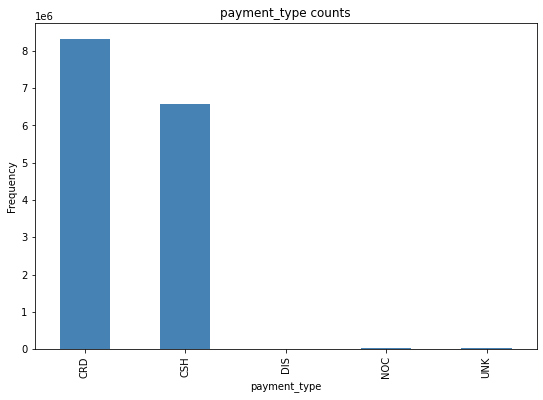

In [67]:
counts = taxi_fare_df['payment_type'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('payment_type' + ' counts')
ax.set_xlabel('payment_type') 
ax.set_ylabel("Frequency")

In [68]:
# converting the pickup_datetime to datetime format
taxi_fare_df['pickup_datetime'] =  pd.to_datetime(taxi_fare_df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [69]:
len(taxi_fare_df)

15004556

In [70]:
len(upd_taxi_trip_df)

13895775

### Merging the `upd_taxi_trip_df` with `taxi_fare_df`

In [71]:
merged_taxi_df = upd_taxi_trip_df.merge(taxi_fare_df, on=['medallion','hack_license','vendor_id','pickup_datetime'], how='left')

In [72]:
merged_taxi_df.head()

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,trip_dist_miles,trip_diff_seconds,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,740BD5BE61840BE4FE3905CC3EBE3E7E,E48B185060FB0FF49BE6DA43E69E624B,CMT,1,2013-10-01 12:44:29,2013-10-01 12:53:26,1,536,1.2,-73.974319,...,0.884191,537.0,8.044693,CRD,8.0,0.0,0.5,2.1,0.0,10.6
1,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 19:44:55,2013-10-02 20:03:55,1,1139,5.1,-73.981239,...,2.075469,1140.0,16.105263,CRD,18.0,1.0,0.5,3.0,0.0,22.5
2,EA05309C30F375695F44C96108ACB10F,1D10D8AC5B07D80861761365A05A9AE2,CMT,1,2013-10-02 22:01:18,2013-10-02 22:09:18,1,480,2.2,-74.002991,...,0.454633,480.0,16.500000,CRD,9.5,0.5,0.5,2.1,0.0,12.6
3,B36D7AB5B422EA1A0588EFD1D8155EF3,669F420B42A0739A5D1058184AD227ED,CMT,1,2013-10-03 12:14:35,2013-10-03 12:26:04,1,689,0.9,-73.967178,...,0.889170,689.0,4.702467,CRD,8.5,0.0,0.5,1.8,0.0,10.8
4,28172009F5513B25F4091C0929C4515D,ABE08BCFEBF3F5F7339CA2170EEC1DEE,CMT,1,2013-10-02 00:33:37,2013-10-02 01:06:16,1,1959,14.8,-73.784142,...,10.234611,1959.0,27.197550,CRD,43.0,0.5,0.5,11.0,0.0,55.0


In [73]:
len(merged_taxi_df)

13895775

In [74]:
merged_taxi_df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_time_in_secs', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_dist_miles', 'trip_diff_seconds', 'avg_speed', 'payment_type',
       'fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount',
       'total_amount'],
      dtype='object')

In [75]:
merged_taxi_df[merged_taxi_df['total_amount'] <= 0]

,medallion,hack_license,vendor_id,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,...,trip_dist_miles,trip_diff_seconds,avg_speed,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount


#### Keeping values for `rate_code` between 1 to 6

(Refer to: https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

In [76]:
rate_code_list = [1,2,3,4,5,6]
merged_taxi_df = merged_taxi_df[merged_taxi_df['rate_code'].isin(rate_code_list)]

In [77]:
len(merged_taxi_df)

13895235

In [78]:
merged_taxi_df['payment_type'].value_counts()

CRD    7797241
CSH    6031548
UNK      39094
NOC      20465
DIS       6887
Name: payment_type, dtype: int64

In [79]:
# keeping only rows where trip_diff_seconds is less than 20K
merged_taxi_df = merged_taxi_df[merged_taxi_df['trip_diff_seconds'] < 20000.0]

In [80]:
merged_taxi_df.isnull().sum()

medallion            0
hack_license         0
vendor_id            0
rate_code            0
pickup_datetime      0
dropoff_datetime     0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_dist_miles      0
trip_diff_seconds    0
avg_speed            0
payment_type         0
fare_amount          0
surcharge            0
mta_tax              0
tip_amount           0
tolls_amount         0
total_amount         0
dtype: int64

In [88]:
len(merged_taxi_df)

13895209

In [81]:
# merged_taxi_df.to_csv('/data/shared/debdeep_guha/nyc_taxi_data/cleaned_full_taxi_data.csv', header=True, index=False)